<a href="https://colab.research.google.com/github/akhil27/Akhil_INFO5731_SPRING2025/blob/main/Indraganti_Akhil_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
!pip install --upgrade --force-reinstall numpy gensim scipy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled 

In [ ]:
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.2 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn gensim nltk


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total selected documents: 2000
Dictionary size: 1740
Number of documents in the corpus: 1947

LDA Topics:
Topic 0: 0.024*"god" + 0.018*"jesus" + 0.016*"one" + 0.014*"believe" + 0.014*"may" + 0.012*"say" + 0.011*"us" + 0.010*"people" + 0.009*"fact" + 0.009*"said"
Topic 1: 0.025*"use" + 0.016*"edu" + 0.015*"also" + 0.014*"program" + 0.013*"information" + 0.012*"news" + 0.011*"source" + 0.010*"used" + 0.010*"list" + 0.009*"section"
Topic 2: 0.033*"mr" + 0.022*"must" + 0.022*"drug" + 0.015*"several" + 0.015*"police" + 0.015*"business" + 0.014*"key" + 0.014*"private" + 0.014*"given" + 0.013*"hope"
Topic 3: 0.028*"people" + 0.024*"would" + 0.021*"one" + 0.017*"think" + 0.017*"like" + 0.016*"know" + 0.014*"time" + 0.013*"well" + 0.012*"good" + 0.011*"much"
Topic 4: 0.079*"armenian" + 0.061*"armenians" + 0.043*"turkish" + 0.042*"context" + 0.032*"legal" + 0.031*"military" + 0.031*"code" + 0.027*"population" + 0.027*"outside" + 0.026*"political"
Topic 5: 0.026*"anyone" + 0.025*"get" + 0.024*"so

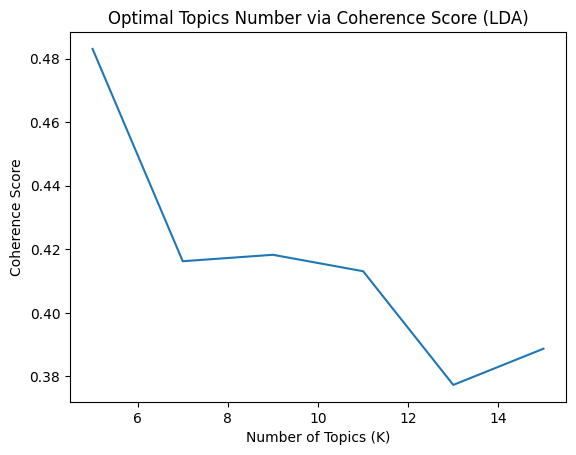


Optimal number of topics for LDA: 5 with coherence score: 0.483


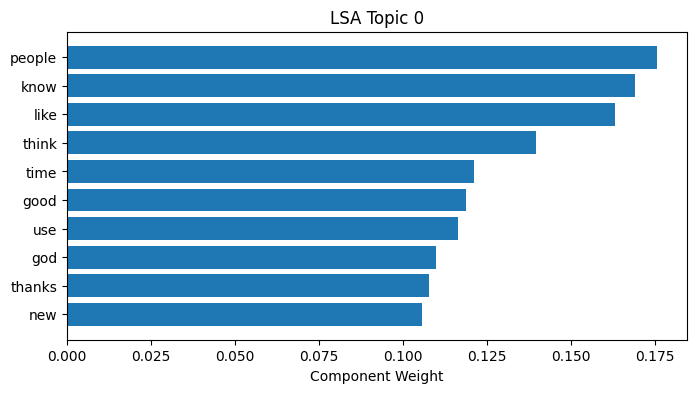

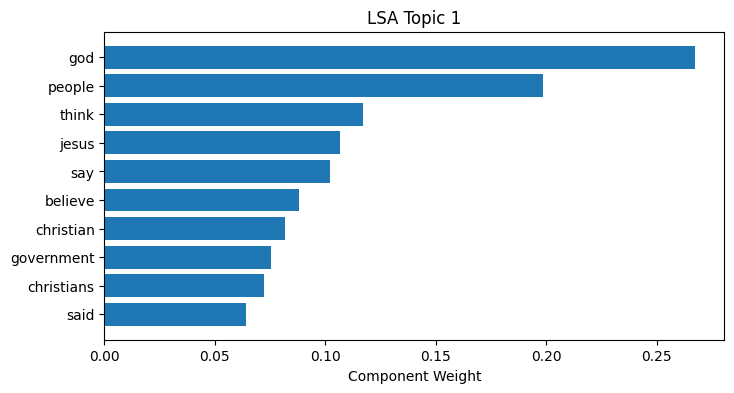

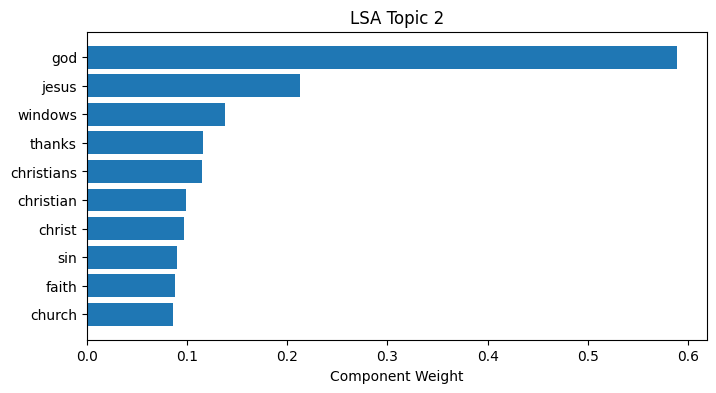

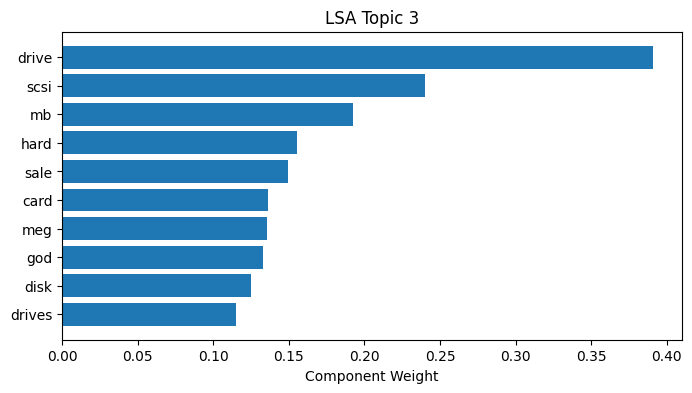

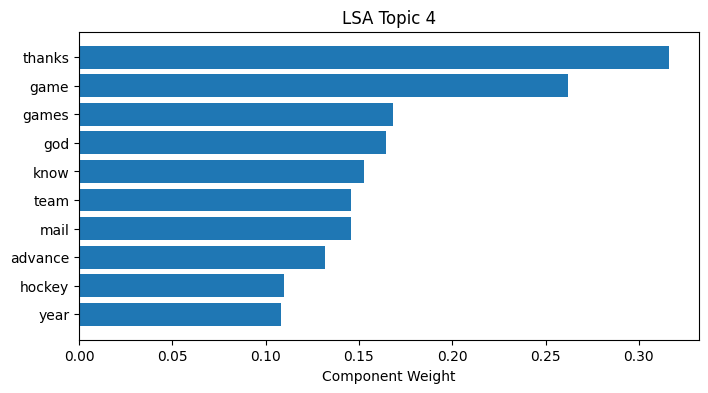

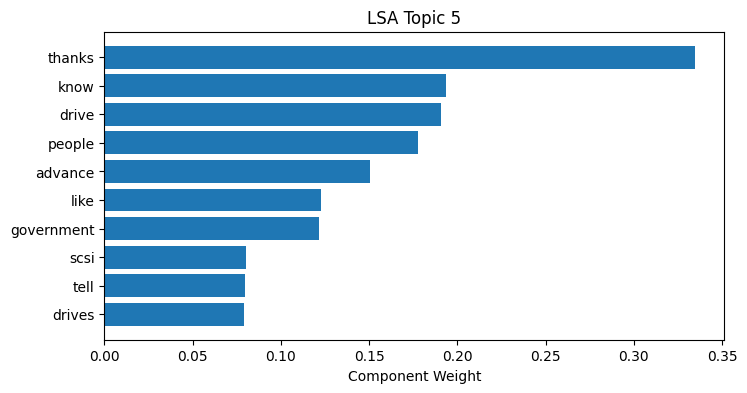

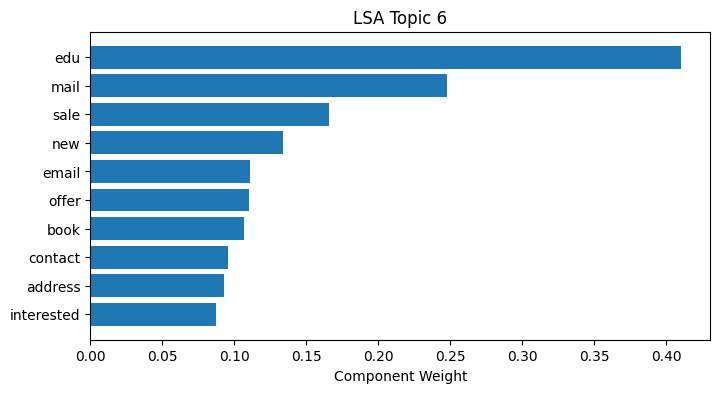

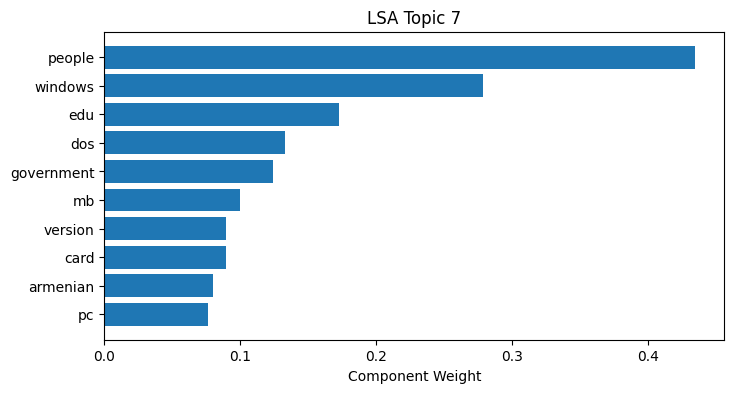

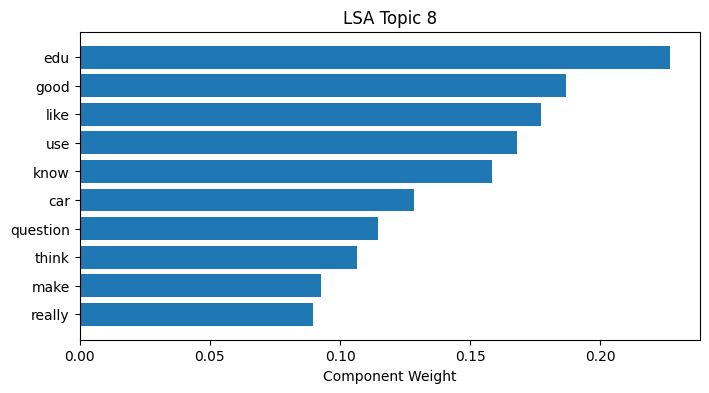

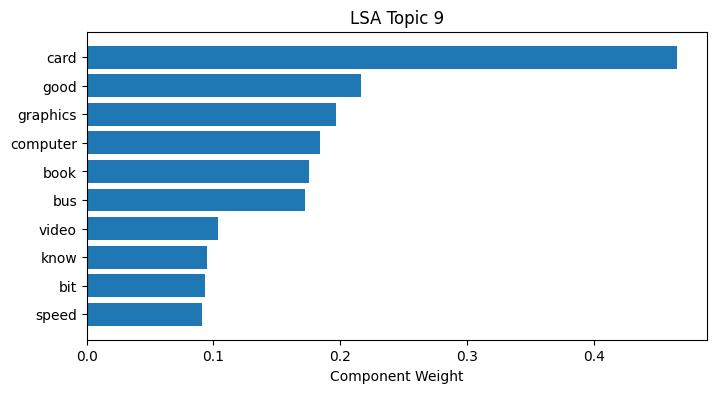

In [ ]:
import random
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk
import gensim.corpora as corpora
import gensim.models as models
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

newsgroups_categories = fetch_20newsgroups(subset='all').target_names
news_articles = []

for category_name in newsgroups_categories:
    category_articles = fetch_20newsgroups(subset='all', categories=[category_name], remove=('headers', 'footers', 'quotes'))
    random.seed(42)
    selected_articles = random.sample(category_articles.data, 100)
    news_articles.extend(selected_articles)

print(f"Total selected documents: {len(news_articles)}")

def tokenize_and_clean(text):
    return [token for token in simple_preprocess(text, deacc=True) if token not in english_stopwords]

cleaned_documents = [tokenize_and_clean(doc) for doc in news_articles]
cleaned_documents = [tokens for tokens in cleaned_documents if len(tokens) > 0]

bow_dictionary = corpora.Dictionary(cleaned_documents)
bow_dictionary.filter_extremes(no_below=15, no_above=0.5)
bow_corpus = [bow_dictionary.doc2bow(doc) for doc in cleaned_documents]

print(f"Dictionary size: {len(bow_dictionary)}")
print(f"Number of documents in the corpus: {len(bow_corpus)}")

topic_count = 10
lda_topic_model = models.LdaModel(corpus=bow_corpus,
                                  id2word=bow_dictionary,
                                  num_topics=topic_count,
                                  random_state=42,
                                  update_every=1,
                                  chunksize=100,
                                  passes=10,
                                  alpha='auto')

print("\nLDA Topics:")
for topic_index, topic_keywords in lda_topic_model.print_topics(-1):
    print(f"Topic {topic_index}: {topic_keywords}")

lda_topic_coherence = CoherenceModel(model=lda_topic_model, texts=cleaned_documents, dictionary=bow_dictionary, coherence='c_v')
lda_coherence_score = lda_topic_coherence.get_coherence()
print(f"\nLDA Coherence Score (K=10): {lda_coherence_score:.3f}")

documents_text = [" ".join(doc) for doc in cleaned_documents]
tfidf_builder = TfidfVectorizer(max_df=0.5, min_df=15, stop_words='english')
tfidf_matrix = tfidf_builder.fit_transform(documents_text)

lsa_model = TruncatedSVD(n_components=topic_count, random_state=42)
lsa_transformed = lsa_model.fit_transform(tfidf_matrix)

feature_names = tfidf_builder.get_feature_names_out()
print("\nLSA Topics:")
for topic_idx, topic_vector in enumerate(lsa_model.components_):
    top_terms = [feature_names[i] for i in np.argsort(topic_vector)[::-1][:10]]
    print(f"LSA Topic {topic_idx}: {top_terms}")

lsa_topic_terms = [[feature_names[i] for i in np.argsort(comp)[::-1][:10]] for comp in lsa_model.components_]
lsa_topic_coherence = CoherenceModel(topics=lsa_topic_terms, texts=cleaned_documents, dictionary=bow_dictionary, coherence='c_v')
lsa_coherence_score = lsa_topic_coherence.get_coherence()
print(f"\nLSA Coherence Score (K=10): {lsa_coherence_score:.3f}")

def calculate_coherence_scores(dictionary, corpus, texts, start, limit, step):
    scores = []
    for k in range(start, limit, step):
        model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k,
                                random_state=42, update_every=1, chunksize=100, passes=10, alpha='auto')
        score_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        scores.append(score_model.get_coherence())
    return scores

range_start, range_end, increment = 5, 16, 2
coherence_scores = calculate_coherence_scores(bow_dictionary, bow_corpus, cleaned_documents, range_start, range_end, increment)

x_values = range(range_start, range_end, increment)
plt.plot(x_values, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Optimal Topics Number via Coherence Score (LDA)")
plt.show()

best_k = x_values[np.argmax(coherence_scores)]
print(f"\nOptimal number of topics for LDA: {best_k} with coherence score: {max(coherence_scores):.3f}")

lda_visualization = gensimvis.prepare(lda_topic_model, bow_corpus, bow_dictionary)
pyLDAvis.display(lda_visualization)

for topic_index, topic_vector in enumerate(lsa_model.components_):
    top_term_indices = np.argsort(topic_vector)[::-1][:10]
    keywords = [feature_names[i] for i in top_term_indices]
    weights = topic_vector[top_term_indices]

    plt.figure(figsize=(8, 4))
    plt.barh(range(len(keywords)), weights, align='center')
    plt.yticks(range(len(keywords)), keywords)
    plt.gca().invert_yaxis()
    plt.title(f"LSA Topic {topic_index}")
    plt.xlabel("Component Weight")
    plt.show()


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [ ]:
!pip install bertopic


In [ ]:
pip install plotly matplotlib


In [ ]:
pip install plotly --upgrade


In [ ]:
!pip install bertopic==0.14.1
!pip install numpy==1.21.6
!pip install gensim==4.3.3
!pip install matplotlib plotly


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [ ]:
!pip install bertopic==0.14.1 gensim==4.3.3 plotly nltk --upgrade
!pip install pandas matplotlib --upgrade

2025-04-07 03:42:10,618 - BERTopic - Embedding - Transforming documents to embeddings.


Available columns: ['headline', 'score', 'content', 'processed_text']
Loaded 756 documents from column 'processed_text'.

⏳ Training BERTopic model...


Batches:   0%|          | 0/24 [00:00<?, ?it/s]

2025-04-07 03:43:13,073 - BERTopic - Embedding - Completed ✓
2025-04-07 03:43:13,076 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-07 03:43:15,755 - BERTopic - Dimensionality - Completed ✓
2025-04-07 03:43:15,756 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-07 03:43:15,790 - BERTopic - Cluster - Completed ✓
2025-04-07 03:43:15,795 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-07 03:43:15,919 - BERTopic - Representation - Completed ✓
2025-04-07 03:43:16,170 - BERTopic - Topic reduction - Reducing number of topics
2025-04-07 03:43:16,171 - BERTopic - Topic reduction - Number of topics (5) is equal or higher than the clustered topics(5).
2025-04-07 03:43:16,173 - BERTopic - Representation - Fine-tuning topics using representation models.


Initial number of topics: 4


2025-04-07 03:43:16,430 - BERTopic - Representation - Completed ✓
2025-04-07 03:43:17,125 - BERTopic - Topic reduction - Reducing number of topics
2025-04-07 03:43:17,125 - BERTopic - Topic reduction - Number of topics (10) is equal or higher than the clustered topics(5).
2025-04-07 03:43:17,127 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for K=5: 0.6123


2025-04-07 03:43:17,372 - BERTopic - Representation - Completed ✓
2025-04-07 03:43:18,089 - BERTopic - Topic reduction - Reducing number of topics
2025-04-07 03:43:18,090 - BERTopic - Topic reduction - Number of topics (15) is equal or higher than the clustered topics(5).
2025-04-07 03:43:18,091 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for K=10: 0.6123


2025-04-07 03:43:18,344 - BERTopic - Representation - Completed ✓
2025-04-07 03:43:19,025 - BERTopic - Topic reduction - Reducing number of topics
2025-04-07 03:43:19,025 - BERTopic - Topic reduction - Number of topics (20) is equal or higher than the clustered topics(5).
2025-04-07 03:43:19,026 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for K=15: 0.6123


2025-04-07 03:43:19,270 - BERTopic - Representation - Completed ✓


Coherence for K=20: 0.6123


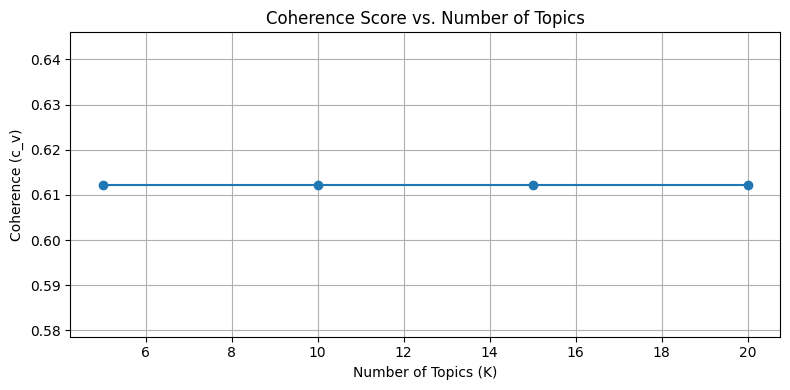

2025-04-07 03:43:20,244 - BERTopic - Topic reduction - Reducing number of topics
2025-04-07 03:43:20,245 - BERTopic - Topic reduction - Number of topics (5) is equal or higher than the clustered topics(5).
2025-04-07 03:43:20,246 - BERTopic - Representation - Fine-tuning topics using representation models.



 Optimal number of topics: 5


2025-04-07 03:43:20,495 - BERTopic - Representation - Completed ✓



 Interpreted Topics:
Topic 0: 0_movi_film_one_like
Topic 1: 1_spidervers_spiderman_movi_across
Topic 2: 2_pinocchio_toro_del_film
Topic 3: 3_creed_rocki_adoni_jordan
Topic 4: 4_schindler_spielberg_list_holocaust

 Generating interactive visualizations...



 Visualizations saved as HTML files.


In [ ]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import pandas as pd
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
import os

csv_file = "final_cleaned_reviews.csv"
df = pd.read_csv(csv_file)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("Available columns:", df.columns.tolist())

text_column = "processed_text"
if text_column not in df.columns:
    raise ValueError(f"Column '{text_column}' not found in dataset.")

text_corpus = df[text_column].dropna().apply(str).tolist()
print(f"Loaded {len(text_corpus)} documents from column '{text_column}'.")

print("\n⏳ Training BERTopic model...")
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(text_corpus)
initial_topic_count = len(topic_model.get_topics()) - 1
print(f"Initial number of topics: {initial_topic_count}")

def extract_topic_terms(model):
    all_topics = []
    for topic_idx in range(len(model.get_topics())):
        topic_words = model.get_topic(topic_idx)
        if topic_words:
            all_topics.append([term for term, _ in topic_words])
    return all_topics

tokens_list = [doc.split() for doc in text_corpus]
dictionary = Dictionary(tokens_list)
bow_corpus = [dictionary.doc2bow(tokens) for tokens in tokens_list]

def evaluate_coherence(base_model, dictionary, tokens, texts, k_values):
    scores = []
    for k in k_values:
        reduced_model = base_model.reduce_topics(texts, nr_topics=k)
        topic_words = extract_topic_terms(reduced_model)
        coherence = CoherenceModel(topics=topic_words, texts=tokens, dictionary=dictionary, coherence='c_v')
        score = coherence.get_coherence()
        print(f"Coherence for K={k}: {score:.4f}")
        scores.append(score)
    return scores

k_range = [5, 10, 15, 20]
coherence_scores = evaluate_coherence(topic_model, dictionary, tokens_list, text_corpus, k_range)

plt.figure(figsize=(8, 4))
plt.plot(k_range, coherence_scores, marker="o")
plt.title("Coherence Score vs. Number of Topics")
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence (c_v)")
plt.grid(True)
plt.tight_layout()
plt.show()

optimal_k = k_range[coherence_scores.index(max(coherence_scores))]
print(f"\n Optimal number of topics: {optimal_k}")
topic_model = topic_model.reduce_topics(text_corpus, nr_topics=optimal_k)

topic_info = topic_model.get_topic_info()
print("\n Interpreted Topics:")
for _, row in topic_info.iterrows():
    if row["Topic"] != -1:
        print(f"Topic {row['Topic']}: {row['Name']}")

print("\n Generating interactive visualizations...")

topic_plot = topic_model.visualize_topics()
topic_plot.show()
topic_plot.write_html("q2_topics_visualization.html")

bar_chart_plot = topic_model.visualize_barchart()
bar_chart_plot.show()
bar_chart_plot.write_html("q2_barchart_visualization.html")

hierarchy_plot = topic_model.visualize_hierarchy()
hierarchy_plot.show()
hierarchy_plot.write_html("q2_hierarchy_visualization.html")

print("\n Visualizations saved as HTML files.")


# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
!pip install openai==0.28
!pip install --upgrade openai bertopic

  Using cached openai-0.28.0-py3-none-any.whl.metadata (13 kB)
Using cached openai-0.28.0-py3-none-any.whl (76 kB)
  Attempting uninstall: openai
    Found existing installation: openai 1.70.0
    Uninstalling openai-1.70.0:
      Successfully uninstalled openai-1.70.0


  Using cached openai-1.70.0-py3-none-any.whl.metadata (25 kB)
  Using cached bertopic-0.17.0-py3-none-any.whl.metadata (23 kB)
Using cached openai-1.70.0-py3-none-any.whl (599 kB)
Using cached bertopic-0.17.0-py3-none-any.whl (150 kB)
  Attempting uninstall: openai
    Found existing installation: openai 0.28.0
    Uninstalling openai-0.28.0:
      Successfully uninstalled openai-0.28.0
  Attempting uninstall: bertopic
    Found existing installation: bertopic 0.14.1
    Uninstalling bertopic-0.14.1:
      Successfully uninstalled bertopic-0.14.1


In [ ]:
pip install bertopic sentence-transformers openai

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from bertopic import BERTopic
from bertopic.representation import OpenAI, MaximalMarginalRelevance
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from openai import OpenAI as OpenAIClient
from tqdm import tqdm
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import warnings
import getpass
from sentence_transformers import SentenceTransformer

warnings.filterwarnings("ignore")

random_seed = 42
documents_per_class = 100
enable_gpt_labeling = True

def fetch_openai_api_key():
    key_input = getpass.getpass("Enter your OpenAI API key (or press Enter to skip): ")
    if key_input and not key_input.startswith('sk-'):
        raise ValueError("Invalid API key format. It should start with 'sk-'")
    return key_input if key_input else None

print("Initializing OpenAI client...")
openai_key = fetch_openai_api_key()
gpt_client = OpenAIClient(api_key=openai_key) if openai_key else None
if not gpt_client and enable_gpt_labeling:
    print("Warning: No valid OpenAI API key provided. Falling back to MMR representation.")
    enable_gpt_labeling = False

print("Loading local embedding model...")
embedding_backend = SentenceTransformer("all-MiniLM-L6-v2")

print("Loading 20 Newsgroups dataset...")
news_dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
news_texts = news_dataset.data
news_labels = news_dataset.target

print(f"Sampling {documents_per_class} documents from each of the 20 newsgroups...")
sampled_texts = []
sampled_labels = []

for label in range(20):
    label_indices = np.where(np.array(news_labels) == label)[0]
    selected_indices = np.random.choice(label_indices, size=documents_per_class, replace=False)
    sampled_texts.extend([news_texts[idx] for idx in selected_indices])
    sampled_labels.extend([news_labels[idx] for idx in selected_indices])

news_texts = sampled_texts
news_labels = sampled_labels

print("Filtering out very short documents...")
news_texts = [text for text in news_texts if len(text.strip()) > 50]
print(f"Number of documents after filtering: {len(news_texts)}")

labeling_models = []
if enable_gpt_labeling and gpt_client:
    print("Setting up GPT representation model...")
    gpt_prompt = "Summarize the common theme of the following group of documents in a short and clear topic label."
    gpt_representation = OpenAI(
        client=gpt_client,
        model="gpt-3.5-turbo",
        prompt=gpt_prompt,
        delay_in_seconds=2,
        chat=True,
        nr_docs=5,
        nr_words=60
    )
    labeling_models.append(gpt_representation)
else:
    print("Using MMR as fallback representation model due to missing OpenAI setup.")

labeling_models.append(MaximalMarginalRelevance(diversity=0.5))

print("Creating BERTopic model...")
text_vectorizer = CountVectorizer(stop_words="english", min_df=1, max_df=0.98)
tfidf_converter = ClassTfidfTransformer(reduce_frequent_words=True)

bertopic_instance = BERTopic(
    embedding_model=embedding_backend,
    vectorizer_model=text_vectorizer,
    ctfidf_model=tfidf_converter,
    representation_model={"GPT": labeling_models[0]} if enable_gpt_labeling and gpt_client else labeling_models[-1],
    nr_topics="auto",
    verbose=True
)

print("Fitting BERTopic model...")
try:
    topic_labels, topic_scores = bertopic_instance.fit_transform(news_texts)
except Exception as model_error:
    print(f"Error during model fitting: {model_error}")
    if "quota" in str(model_error).lower() or "context_length_exceeded" in str(model_error).lower():
        print("\nSolution: You've exceeded your OpenAI quota or token limit. Switching to MMR only.")
        bertopic_instance.representation_model = labeling_models[-1]
        topic_labels, topic_scores = bertopic_instance.fit_transform(news_texts)
    else:
        raise

def compute_coherence(topic_model_instance, corpus_documents, top_words=10):
    tokenized_docs = [doc.split() for doc in corpus_documents]
    gensim_dictionary = Dictionary(tokenized_docs)
    gensim_corpus = [gensim_dictionary.doc2bow(tokens) for tokens in tokenized_docs]
    topic_terms = []

    for topic_id in range(len(set(topic_labels)) - 1):
        keywords = topic_model_instance.get_topic(topic_id)
        if keywords and isinstance(keywords, list):
            top_words_only = [term[0] for term in keywords[:top_words] if isinstance(term[0], str)]
            if top_words_only:
                topic_terms.append(top_words_only)

    if not topic_terms:
        raise ValueError("No valid topics with keywords found for coherence calculation.")

    coherence_instance = CoherenceModel(
        topics=topic_terms,
        texts=tokenized_docs,
        dictionary=gensim_dictionary,
        coherence='c_v'
    )
    return coherence_instance.get_coherence()

print("Calculating coherence score...")
initial_score = compute_coherence(bertopic_instance, news_texts)
print(f"Initial Coherence Score: {initial_score:.4f}")

print("\nFinding optimal number of topics...")
upper_bound = 30
lower_bound = 5
optimal_score = -1
optimal_topic_count = None

for topic_total in tqdm(range(lower_bound, upper_bound + 1)):
    reduced_model_variant = bertopic_instance.reduce_topics(news_texts, nr_topics=topic_total)
    eval_score = compute_coherence(reduced_model_variant, news_texts)
    if eval_score > optimal_score:
        optimal_score = eval_score
        optimal_topic_count = topic_total

print(f"\nOptimal number of topics: {optimal_topic_count} with coherence score: {optimal_score:.4f}")

print("\nRetraining model with optimal number of topics...")
bertopic_instance = BERTopic(
    embedding_model=embedding_backend,
    vectorizer_model=text_vectorizer,
    ctfidf_model=tfidf_converter,
    representation_model={"GPT": labeling_models[0]} if enable_gpt_labeling and gpt_client else labeling_models[-1],
    nr_topics=optimal_topic_count,
    verbose=True
)
topic_labels, topic_scores = bertopic_instance.fit_transform(news_texts)

final_score = compute_coherence(bertopic_instance, news_texts)
print(f"\nFinal Coherence Score: {final_score:.4f}")

print("\nTopic Information:")
summary_df = bertopic_instance.get_topic_info()
print(summary_df.head(10))

print("\nSaving model...")
bertopic_instance.save("20newsgroups_bertopic", serialization="safetensors", save_ctfidf=True)

print("\nGenerating visualizations...")
bertopic_instance.visualize_topics().write_html("q3_topic_visualization.html")
bertopic_instance.visualize_barchart(top_n_topics=12).write_html("q3_topic_barchart.html")

print("\Process completed successfully!")


Initializing OpenAI client...
Enter your OpenAI API key (or press Enter to skip): ··········
Loading local embedding model...
Loading 20 Newsgroups dataset...


2025-04-07 01:57:16,404 - BERTopic - Embedding - Transforming documents to embeddings.


Sampling 100 documents from each of the 20 newsgroups...
Filtering out very short documents...
Number of documents after filtering: 1912
Setting up GPT representation model...
Creating BERTopic model...
Fitting BERTopic model...


Batches:   0%|          | 0/60 [00:00<?, ?it/s]

2025-04-07 02:00:16,640 - BERTopic - Embedding - Completed ✓
2025-04-07 02:00:16,642 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-07 02:00:24,434 - BERTopic - Dimensionality - Completed ✓
2025-04-07 02:00:24,436 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-07 02:00:24,502 - BERTopic - Cluster - Completed ✓
2025-04-07 02:00:24,503 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-07 02:00:24,904 - BERTopic - Representation - Completed ✓
2025-04-07 02:00:24,906 - BERTopic - Topic reduction - Reducing number of topics
2025-04-07 02:00:24,919 - BERTopic - Representation - Fine-tuning topics using representation models.
100%|██████████| 10/10 [00:25<00:00,  2.56s/it]
2025-04-07 02:00:51,206 - BERTopic - Representation - Completed ✓
2025-04-07 02:00:51,210 - BERTopic - Topic reduction - Reduced number of topics from 31 to 10


Calculating coherence score...
Initial Coherence Score: 0.4147

Finding optimal number of topics...


  0%|          | 0/26 [00:00<?, ?it/s]2025-04-07 02:00:54,374 - BERTopic - Topic reduction - Reducing number of topics
2025-04-07 02:00:54,385 - BERTopic - Representation - Fine-tuning topics using representation models.

100%|██████████| 5/5 [00:15<00:00,  3.01s/it]
2025-04-07 02:01:10,068 - BERTopic - Representation - Completed ✓
2025-04-07 02:01:10,072 - BERTopic - Topic reduction - Reduced number of topics from 10 to 5
  4%|▍         | 1/26 [00:18<07:46, 18.68s/it]2025-04-07 02:01:13,053 - BERTopic - Topic reduction - Reducing number of topics
2025-04-07 02:01:13,054 - BERTopic - Topic reduction - Number of topics (6) is equal or higher than the clustered topics(5).
2025-04-07 02:01:13,055 - BERTopic - Representation - Fine-tuning topics using representation models.

100%|██████████| 5/5 [00:12<00:00,  2.51s/it]
2025-04-07 02:01:26,356 - BERTopic - Representation - Completed ✓
  8%|▊         | 2/26 [00:34<06:54, 17.26s/it]2025-04-07 02:01:29,328 - BERTopic - Topic reduction - Reduc


Optimal number of topics: 5 with coherence score: 0.4323

Retraining model with optimal number of topics...


Batches:   0%|          | 0/60 [00:00<?, ?it/s]

2025-04-07 02:11:23,787 - BERTopic - Embedding - Completed ✓
2025-04-07 02:11:23,788 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-07 02:11:31,669 - BERTopic - Dimensionality - Completed ✓
2025-04-07 02:11:31,671 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-07 02:11:31,739 - BERTopic - Cluster - Completed ✓
2025-04-07 02:11:31,740 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-07 02:11:32,201 - BERTopic - Representation - Completed ✓
2025-04-07 02:11:32,203 - BERTopic - Topic reduction - Reducing number of topics
2025-04-07 02:11:32,214 - BERTopic - Representation - Fine-tuning topics using representation models.
100%|██████████| 5/5 [00:13<00:00,  2.75s/it]
2025-04-07 02:11:46,578 - BERTopic - Representation - Completed ✓
2025-04-07 02:11:46,582 - BERTopic - Topic reduction - Reduced number of topics from 33 to 5



Final Coherence Score: 0.4498

Topic Information:
   Topic  Count                          Name  \
0     -1    681        -1_entry_output_use_ms   
1      0    531          0_use_space_like_edu   
2      1    501        1_people_god_file_said   
3      2    186   2_hockey_team_league_season   
4      3     13  3_xxxx_shape_sphere_coplanar   

                                      Representation  \
0  [entry, output, use, ms, just, president, list...   
1  [use, space, like, edu, widget, drive, availab...   
2  [people, god, file, said, gun, armenians, jesu...   
3  [hockey, team, league, season, games, nhl, pla...   
4  [xxxx, shape, sphere, coplanar, plane, vertice...   

                                                 GPT  \
0  [I'd be happy to help! Please provide me with ...   
1  [Please provide the group of documents that yo...   
2  [I can help with that! Please provide me with ...   
3  [Sure, please provide me with the group of doc...   
4  [Please provide the group of docum

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from umap import UMAP
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import torch
import numpy as np

# Load and sample 100 docs from each category (20 x 100 = 2000)
categories = fetch_20newsgroups(subset='all').target_names
docs = []
for cat in categories:
    newsgroup = fetch_20newsgroups(subset='all', categories=[cat], remove=('headers', 'footers', 'quotes'))
    docs.extend(newsgroup.data[:100])
docs = [doc for doc in docs if len(doc.strip()) > 50]

# Use GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
embedding_model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

# Precompute embeddings
print("Encoding embeddings...")
embeddings = embedding_model.encode(docs, batch_size=32, show_progress_bar=True)

# --- Default BERTopic model ---
print("Training default BERTopic model...")
default_model = BERTopic()
default_topics, _ = default_model.fit_transform(docs)

# --- Custom BERTopic model with DBSCAN ---
print("Training custom BERTopic model with DBSCAN...")
umap_model = UMAP(n_neighbors=10, n_components=2, metric='cosine', random_state=42)
dbscan_model = DBSCAN(eps=0.7, min_samples=5, metric='cosine')

custom_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=dbscan_model,
    verbose=True
)
custom_topics, _ = custom_model.fit_transform(docs, embeddings)

# --- Topic Coherence Comparison ---
def compute_coherence_score(model, documents, top_n=10):
    topic_words = []
    for topic in range(len(model.get_topics())):
        words = model.get_topic(topic)
        if words:
            topic_words.append([word for word, _ in words[:top_n]])

    tokenized_docs = [doc.split() for doc in documents]
    dictionary = Dictionary(tokenized_docs)
    coherence_model = CoherenceModel(
        topics=topic_words,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence='c_v'
    )
    return coherence_model.get_coherence()

print("Computing coherence scores...")
default_coh = compute_coherence_score(default_model, docs)
custom_coh = compute_coherence_score(custom_model, docs)

print(f"\nDefault BERTopic Coherence Score: {default_coh:.4f}")
print(f"Custom BERTopic (DBSCAN) Coherence Score: {custom_coh:.4f}\n")

# --- Visualizations ---
print("Saving interactive topic visualizations...")
default_model.visualize_topics().write_html("q4_default_topics.html")
custom_model.visualize_topics().write_html("q4_custom_topics.html")

# --- Sample Topic Tables ---
print("Default Model Topics:")
print(default_model.get_topic_info().head())

print("\nCustom Model Topics:")
print(custom_model.get_topic_info().head())


Encoding embeddings...


Batches:   0%|          | 0/59 [00:00<?, ?it/s]

Training default BERTopic model...


2025-04-07 03:41:02,111 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Training custom BERTopic model with DBSCAN...


2025-04-07 03:41:08,552 - BERTopic - Dimensionality - Completed ✓
2025-04-07 03:41:08,554 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-07 03:41:08,630 - BERTopic - Cluster - Completed ✓
2025-04-07 03:41:08,635 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-07 03:41:09,267 - BERTopic - Representation - Completed ✓


Computing coherence scores...

Default BERTopic Coherence Score: 0.4328
Custom BERTopic (DBSCAN) Coherence Score: 0.4603

Saving interactive topic visualizations...
Default Model Topics:
   Topic  Count               Name  \
0     -1    526   -1_the_to_of_and   
1      0    182   0_the_game_to_in   
2      1    139  1_the_bike_and_on   
3      2    131   2_of_the_is_that   
4      3     91     3_of_is_it_the   

                                     Representation  \
0    [the, to, of, and, is, in, it, for, that, you]   
1  [the, game, to, in, was, and, he, team, of, for]   
2    [the, bike, and, on, it, to, in, of, for, car]   
3    [of, the, is, that, to, and, god, not, in, it]   
4    [of, is, it, the, and, to, that, in, for, are]   

                                 Representative_Docs  
0  [I'm not very impressed by the old so-called "...  
1  [\nGant's ML record  Age 28 this season.\n\nYe...  
2  [So it looks like I'm going to have to put a c...  
3  [I posted this a couple of wee

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
# Write your code here

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:





'''

In [ ]:
import nbformat

notebook_path = "Indraganti_Akhil_Assignment_4.ipynb"

with open(notebook_path) as f:
    notebook = nbformat.read(f, as_version=nbformat.NO_CONVERT)

if 'widgets' in notebook['metadata']:
    del notebook['metadata']['widgets']

with open("fixed_notebook.ipynb", "w") as f:
    nbformat.write(notebook, f)

print("✅ Fixed notebook saved as: fixed_notebook.ipynb")


FileNotFoundError: [Errno 2] No such file or directory: 'Indraganti_Akhil_Assignment_4.ipynb'